In [1]:
from os import path

DATA_DIRECTORY = path.join('1_series_periodicas')
CSV_DIRECTORY  = path.join(DATA_DIRECTORY, 'CSV_results')



# 1. Análisis General (sin ventanas ni desplazamientos)

In [2]:
from charts import GeneralPerformanceChart
from charts import get_autoencoder_matrix_config, build_legend_entry, Matrix2x2Configuration


AE_config = get_autoencoder_matrix_config(CSV_DIRECTORY, 'AE', 25, 10)
VAE_config = get_autoencoder_matrix_config(CSV_DIRECTORY, 'VAE', 25, 15)


## 1.1. Graficas Generales  (Señal simple)

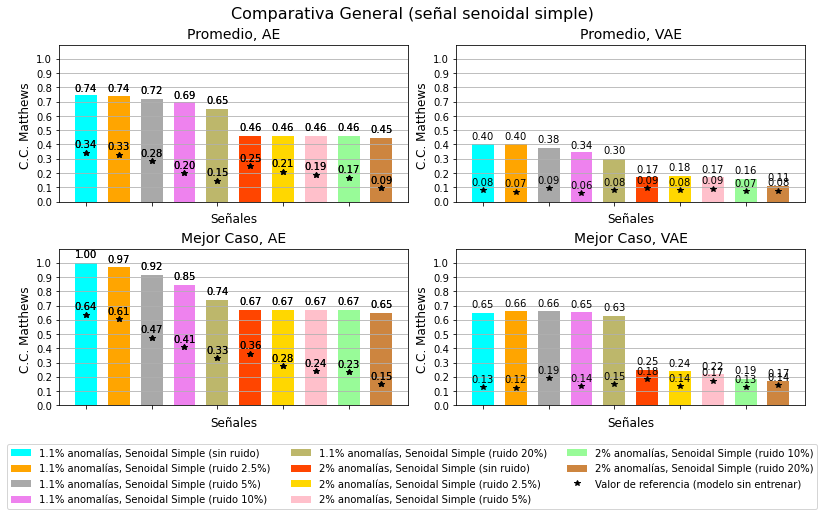

In [3]:
from experiments_configuration import get_senoidal_prefixes_by_kind

GeneralPerformanceChart().plot_dataframe(
    title='Comparativa General (señal senoidal simple)',
    row_1_title='Promedio',
    row_2_title='Mejor Caso',
    row_1_column='promedio',
    row_2_column='mejor',
    config1=AE_config, 
    config2=VAE_config, 
    series=[(build_legend_entry(prefix), prefix) for prefix in get_senoidal_prefixes_by_kind('Simple')]
)
    

## 1.2. Graficas Generales  (Señal combinada)

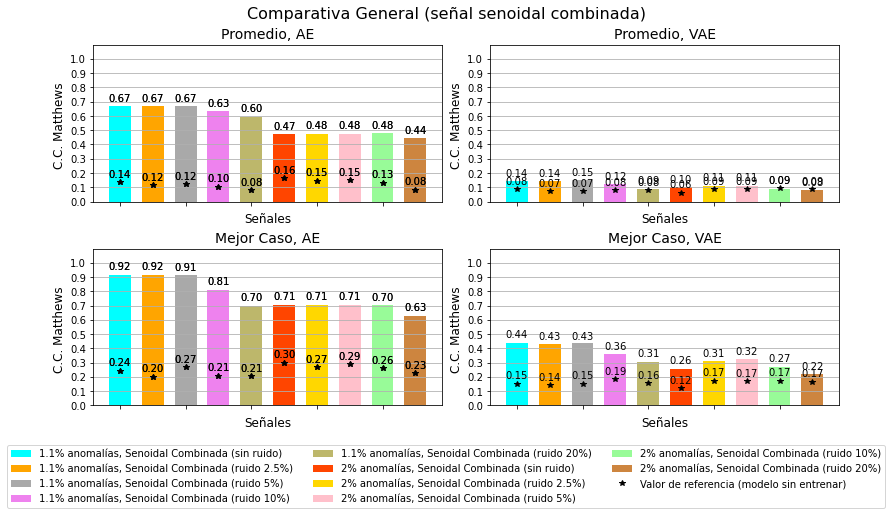

In [4]:
from experiments_configuration import get_senoidal_prefixes_by_kind


GeneralPerformanceChart().plot_dataframe(
    title='Comparativa General (señal senoidal combinada)',
    row_1_title='Promedio',
    row_2_title='Mejor Caso',
    row_1_column='promedio',
    row_2_column='mejor',
    config1=AE_config, 
    config2=VAE_config, 
    series=[(build_legend_entry(prefix), prefix) for prefix in get_senoidal_prefixes_by_kind('Comb')]
)
   
    

# 2. Análisis de ventanas y desplazamientos

In [2]:
from charts import get_autoencoder_matrix_config_from_file


AE_config = get_autoencoder_matrix_config_from_file(CSV_DIRECTORY, 'AE', 'AE_model_25_10')
VAE_config = get_autoencoder_matrix_config_from_file(CSV_DIRECTORY, 'VAE', 'VAE_model_25_15')



## 2.1. Análisis de desplazamientos (generalizando)

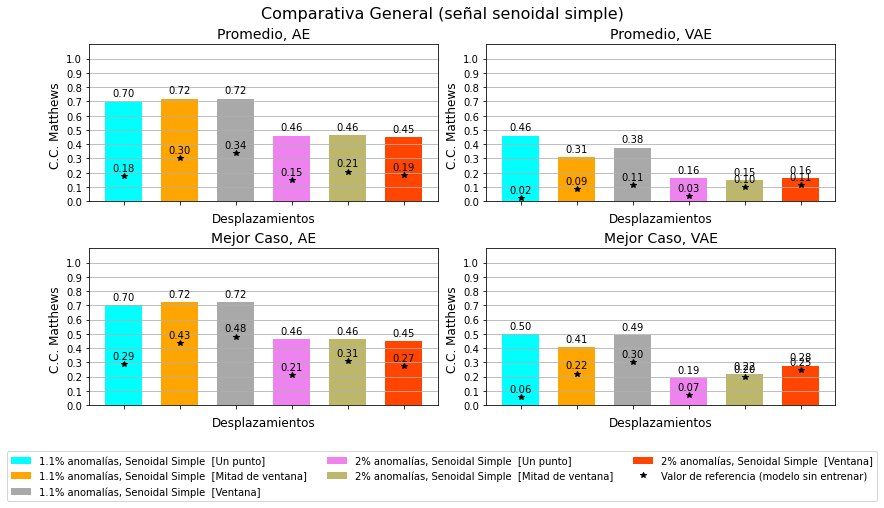

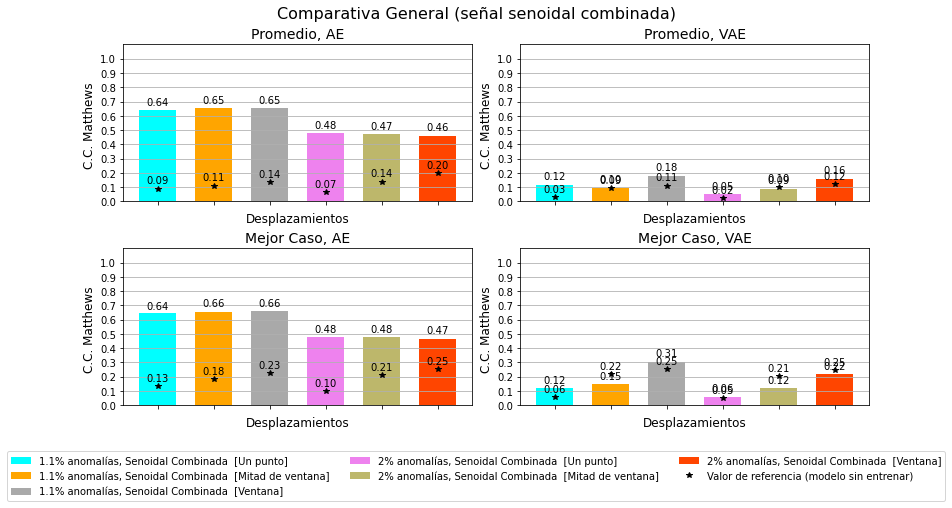

In [3]:
from charts import MatrixDisplacementsChart
from experiments_configuration import get_senoidal_prefixes_by_kind, get_senoidal_windows_autoencoder


MatrixDisplacementsChart(get_senoidal_windows_autoencoder()).plot_dataframe(
    title='Comparativa General (señal senoidal simple)',
    row_1_title='Promedio',
    row_2_title='Mejor Caso',
    row_1_column='promedio',
    row_2_column='mejor',
    config1=AE_config, 
    config2=VAE_config, 
    prefixes=[ prefix for prefix in (
        get_senoidal_prefixes_by_kind('Simple-1-1P') + get_senoidal_prefixes_by_kind('Simple-2P')
    )],
    legend_filter1='Simple-1-1P',
    legend_filter2='Simple-2P',
)


MatrixDisplacementsChart(get_senoidal_windows_autoencoder()).plot_dataframe(
    title='Comparativa General (señal senoidal combinada)',
    row_1_title='Promedio',
    row_2_title='Mejor Caso',
    row_1_column='promedio',
    row_2_column='mejor',
    config1=AE_config, 
    config2=VAE_config, 
    prefixes=[ prefix for prefix in (
        get_senoidal_prefixes_by_kind('Comb-1-1P') + get_senoidal_prefixes_by_kind('Comb-2P')
    )],
    legend_filter1='Comb-1-1P',
    legend_filter2='Comb-2P',
)



## 2.2. Tabla de Análisis de desplazamientos individuales (para el anexo)

In [4]:
from charts import Displacements, get_legend_label_for_displacements_chart, get_average_for_displacement
from experiments_configuration import get_senoidal_prefixes, get_senoidal_windows_autoencoder
import pandas
import numpy


def get_displacement_data(dataframe, prefix):
    data = list()
    for _, displacement_fn in Displacements.values():
        data.append(get_average_for_displacement(
            get_senoidal_windows_autoencoder(),
            'promedio',
            dataframe,
            displacement_fn,
            [prefix]
        ))
    return data


prefixes = get_senoidal_prefixes()
data = list()
for prefix in prefixes:
    data.append(
        get_displacement_data(AE_config.dataframe, prefix) +
        get_displacement_data(VAE_config.dataframe, prefix)
    )

pandas.DataFrame(
    data, 
    index=[get_legend_label_for_displacements_chart(prefix) for prefix in prefixes],
    columns=pandas.MultiIndex.from_product([
        [AE_config.architecture, VAE_config.architecture], 
        [label for label, _ in Displacements.values()]
    ])
).to_csv(
    path.join(CSV_DIRECTORY, 'anexo_tabla_desplazamientos_senoidales_autoencoder.csv'), 
    index=True, 
    sep=';', 
    decimal=',',
    encoding='utf-8-sig'
)


## 2.2. Análisis de ventanas (Senoidal Simple)

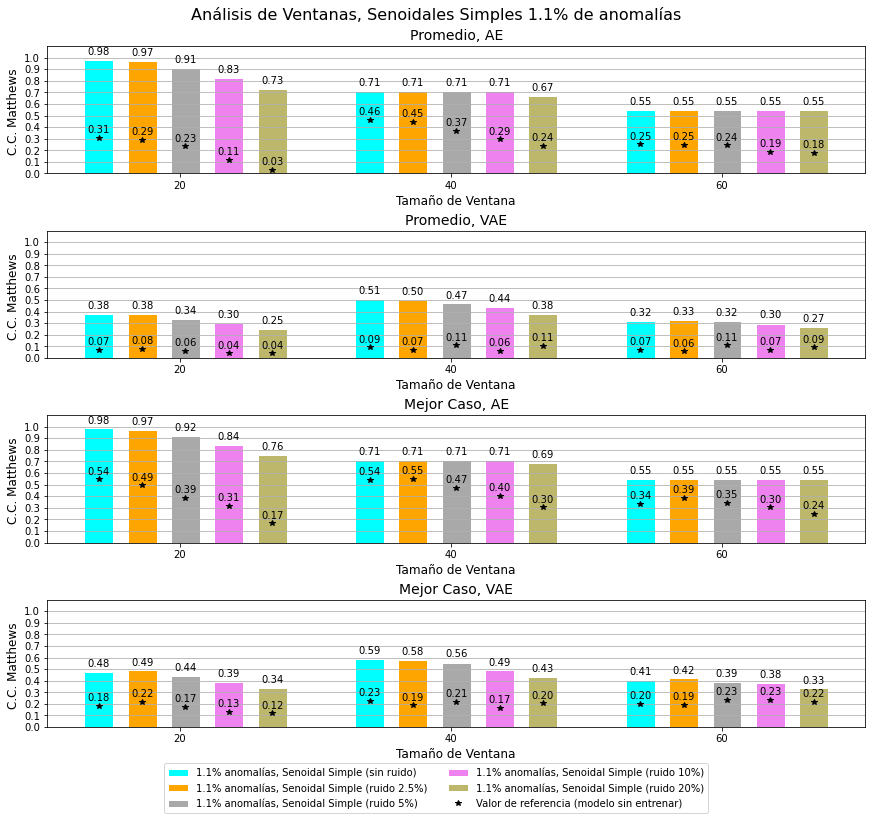

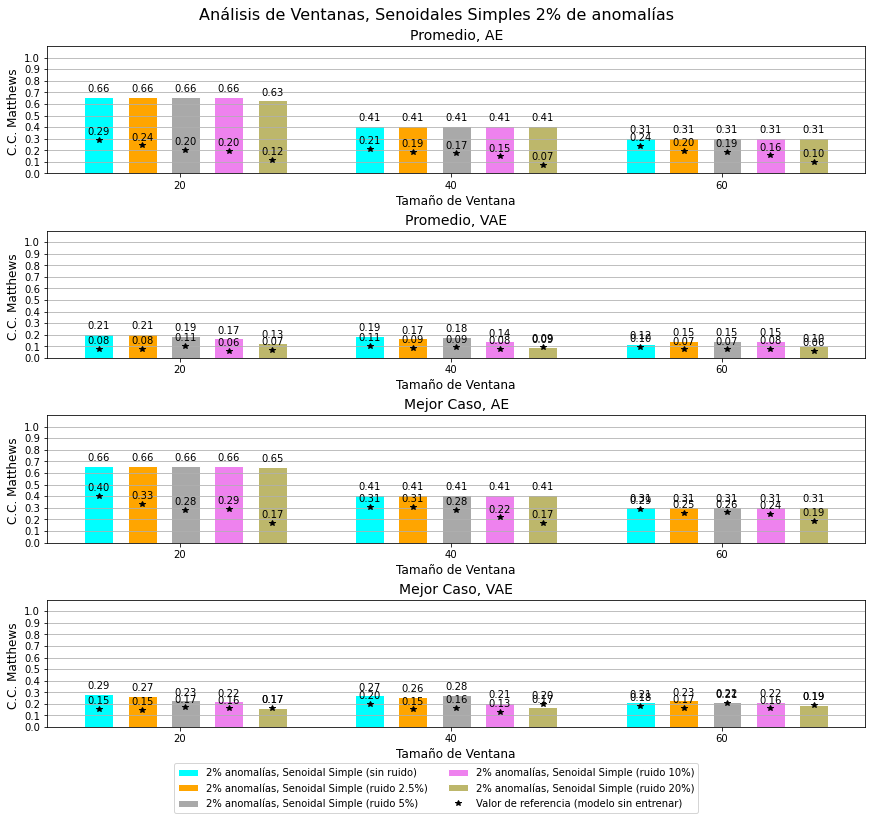

In [5]:
from charts import WindowsPerformanceChart, build_legend_entry
from experiments_configuration import get_senoidal_windows_autoencoder, get_senoidal_prefixes_by_kind

windows_chart = WindowsPerformanceChart(
    AE_config, 
    VAE_config, 
    windows=get_senoidal_windows_autoencoder(),
    bar_width=0.16,
    chart_width=12, 
    chart_height=11
)

windows_chart.plot_dataframe(
    'Análisis de Ventanas, Senoidales Simples 1.1% de anomalías',
    'Promedio', 
    'Mejor Caso',
    [(build_legend_entry(prefix), prefix) for prefix in get_senoidal_prefixes_by_kind('Simple-1-1P')]
)


windows_chart.plot_dataframe(
    'Análisis de Ventanas, Senoidales Simples 2% de anomalías',
    'Promedio', 
    'Mejor Caso',
    [(build_legend_entry(prefix), prefix) for prefix in get_senoidal_prefixes_by_kind('Simple-2P')]
)


## 2.3. Análisis de ventanas (Senoidal Combinada)

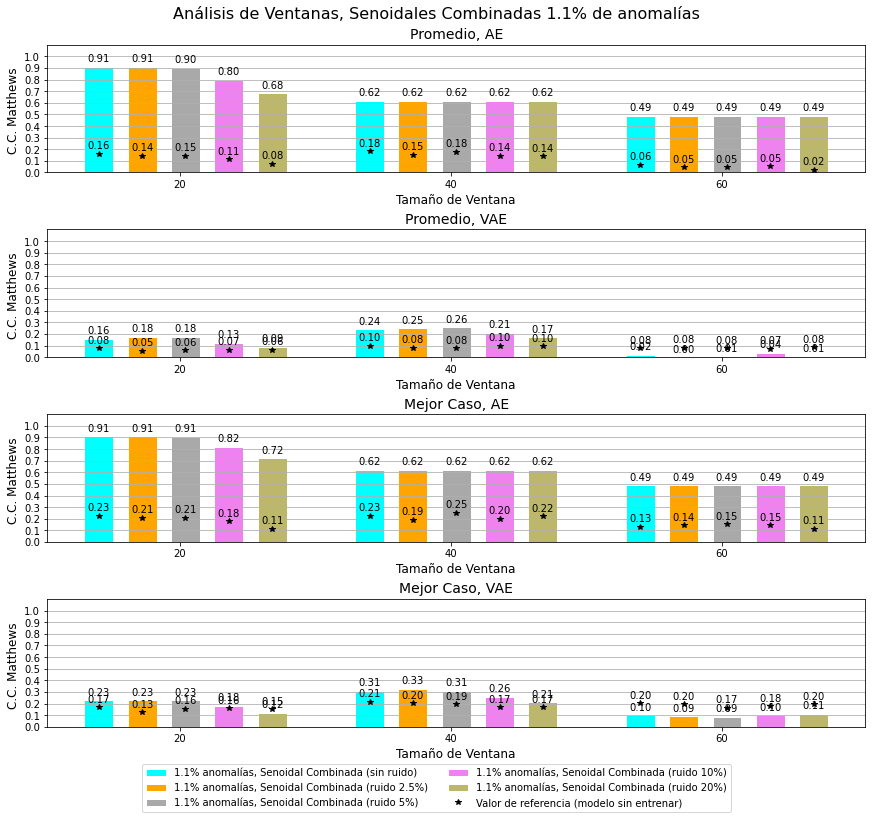

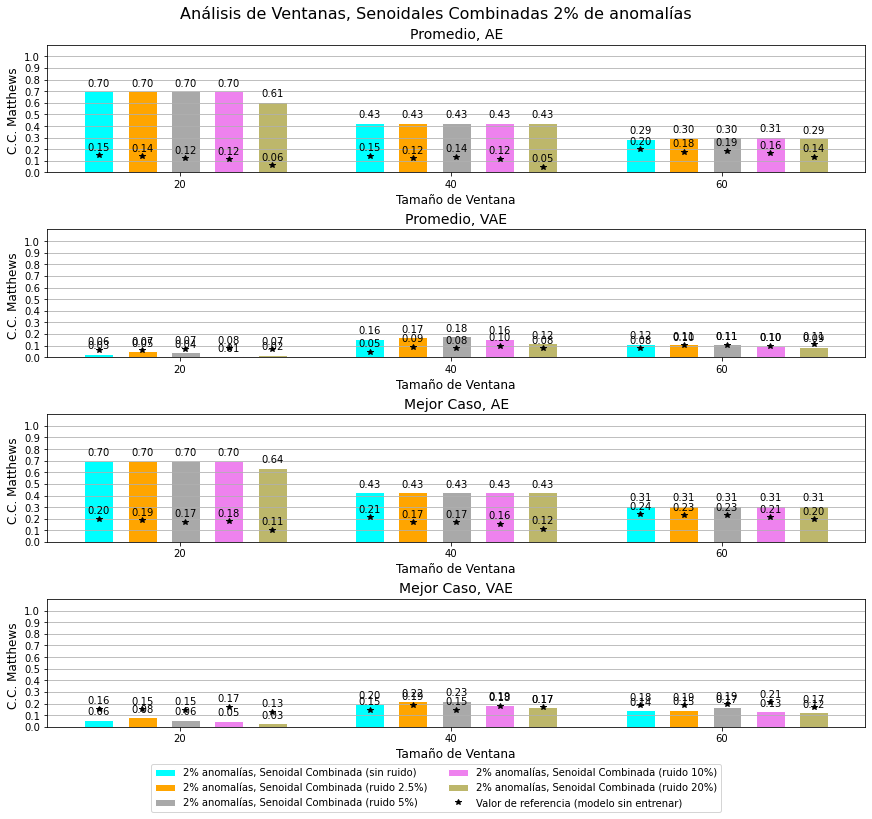

In [6]:
from charts import WindowsPerformanceChart, build_legend_entry
from experiments_configuration import get_senoidal_windows_autoencoder, get_senoidal_prefixes_by_kind

windows_chart = WindowsPerformanceChart(
    AE_config, 
    VAE_config,
    windows=get_senoidal_windows_autoencoder(),
    bar_width=0.16,
    chart_width=12, 
    chart_height=11    
)

windows_chart.plot_dataframe(
    'Análisis de Ventanas, Senoidales Combinadas 1.1% de anomalías',
    'Promedio', 
    'Mejor Caso',
    [(build_legend_entry(prefix), prefix) for prefix in get_senoidal_prefixes_by_kind('Comb-1-1P')]
)


windows_chart.plot_dataframe(
    'Análisis de Ventanas, Senoidales Combinadas 2% de anomalías',
    'Promedio', 
    'Mejor Caso',
    [(build_legend_entry(prefix), prefix) for prefix in get_senoidal_prefixes_by_kind('Comb-2P')]
)